Platt Scaling (PS) is probably the most prevailing parametric calibration method. It aims to train a sigmoid function to map the original outputs from a classifier to calibrated probabilities.

So its simply is a form of Probability Calibration and is a way of transforming classification output into a probability distribution. For example: If you’ve got the dependent variable as 0 & 1 in the train data set, using this method you can convert it into probability.

Platt Scaling is a parametric method. It was originally built to calibrate the support vector machine model and is now also applied to other classifiers. Platt Scaling uses a sigmoid function to map the outputs of a binary classifier to calibrated probabilities. The sigmoidal function of this method is defined as follows:

![](https://imgur.com/SLTK19Y.png)


### Why Probability Calibration

The predictions made by a predictive model sometimes need to be calibrated. Calibrated predictions may (or may not) result in an improved calibration on a reliability diagram.

Some algorithms are fit in such a way that their predicted probabilities are already calibrated, such as in logistic regression.

Other algorithms do not directly produce predictions of probabilities (most likely be uncalibrated), and instead, a prediction of probabilities must be approximated. Examples include neural networks, support vector machines, and decision trees. So the result from these algos may benefit from being modified via calibration.

Calibration of prediction probabilities is a rescaling operation that is applied after the predictions have been made by a predictive model.

There are two popular approaches to calibrating probabilities; they are the Platt Scaling and Isotonic Regression.

Platt Scaling is simpler and is suitable for reliability diagrams with the S-shape. Isotonic Regression is more complex, requires a lot more data (otherwise it may overfit), but can support reliability diagrams with different shapes (is nonparametric).

> _Platt Scaling is most effective when the distortion in the predicted probabilities is sigmoid-shaped. Isotonic Regression is a more powerful calibration method that can correct any monotonic distortion. Unfortunately, this extra power comes at a price. A learning curve analysis shows that Isotonic Regression is more prone to overfitting, and thus performs worse than Platt Scaling, when data is scarce._

— [Predicting Good Probabilities With Supervised Learning](https://www.cs.cornell.edu/~alexn/papers/calibration.icml05.crc.rev3.pdf), 2005.

#### More interpretations of Platt Calibration

In the case of a binary dependent variable, a logistic regression maps the predictors to the probability of occurrence of the dependent variable. Without any transformation, the probability used for training the model is either 1 (if y is positive in the training set) or 0 (if y is negative).

So: Instead of using the absolute values 1 for positive class and 0 for negative class when fitting

![](https://imgur.com/JtPoAXv.png)


Platt suggests to use the mentioned transformation to allow the opposite label to appear with some probability. In this way, some regularization is introduced. When the size of the dataset reaches infinity, _y_+will become 1, and _y_− will become zero.

#### Methods of Platt Scaling

Refer this [**Paper**](https://drive.google.com/file/d/133odBinMOIVb_rh_GQxxsyMRyW-Zts7a/view)

This paper shows that maximum margin methods, such as boosted trees and boosted stumps push probability mass away from 0 and 1 yielding a characteristic sigmoid shaped distortion in the predicted probabilities.

Models such as Naive Bayes, which make unrealistic independence assumptions, push probabilities toward 0 and 1. Other models such as neural nets and bagged trees do not have these biases and predict well-calibrated probabilities. The Paper experiments with two ways of correcting the biased probabilities predicted by some learning methods: Platt Scaling and Isotonic Regression. They qualitatively examine what kinds of distortions these calibration methods are suitable for and quantitatively examine how much data they need to be effective. The empirical results show that after calibration boosted trees, random forests, and SVMs predict the best probabilities.

From this [Paper](https://drive.google.com/file/d/133odBinMOIVb_rh_GQxxsyMRyW-Zts7a/view)

![](https://imgur.com/QHh5CEw.png)


> Two questions arise: where does the sigmoid train set come from? and how to avoid overfitting to this training set? If we use the same data set that was used to train the model

> we want to calibrate, we introduce unwanted bias. For example, if the model learns to discriminate the train set perfectly and orders all the negative examples before the positive examples, then the sigmoid transformation will output just a 0,1 function. So we need to use an independent calibration set in order to get good posterior probabilities. This, however, is not a draw back, since the same set can be used for model and parameter selection.

[Source](https://drive.google.com/file/d/133odBinMOIVb_rh_GQxxsyMRyW-Zts7a/view)

![](https://imgur.com/7oFGm1L.png)


**The MOST IMPORTANT Point above is — if Y[i] is 1, it will be replaced with y+ value else it will be replaced with y- value**

Hence, we have to change the values of y_test as mentioned in the above image. we will calculate y+, y- based on data points in train data

#### Implementation from Scratch

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [4]:
# Randomly initializing weights (w) and intercept values (b)
# dim — size of the w vector we want (or number of features or parameters in this case)
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias
    w — weights, a numpy array of size
    b — bias, a scalar
    '''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    # Above will initialize all w with 0.
    b = 0
    return w,b
  
def sigmoid(z):
    return 1.0/(1 + np.exp(-z)) 



def logloss(y_true, y_pred):
    
    len_y_true = len(y_true)
    
    number_of_plus = np.count_nonzero(y_true == 1)
    number_of_minus = np.count_nonzero(y_true == 0)
    
    # Platt scaling
    # we will calculate y+, y- based on data points in train data
    y_plus = (number_of_plus+1)/(number_of_minus+2)
    y_minus = 1/(number_of_minus+2)
    
    sum_of_loss = 0
    
    for i in range(0, len_y_true):
      if (y_true[i] == 1):
        sum_of_loss += ((y_plus * np.log10(y_pred[i])) + ((1- y_plus) * np.log10(1-y_pred[i])))
      else:
        sum_of_loss += ((y_minus * np.log10(y_pred[i])) + ((1 - y_minus) * np.log10(1-y_pred[i])))
        
    loss = (-1/len_y_true) * sum_of_loss  
    return loss
    
    
  
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w, x) + b
    dw = x*(y - sigmoid(z)) - ((alpha)*(1/N) * w)
    return dw
  
  
def gradient_db(x,y,w,b):
    z = np.dot(w, x) + b
    db = y - sigmoid(z)

    return db

In [5]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0, tol=1e-3):
    """ In this function, we will implement logistic regression"""
    # Here eta0 is learning rate
    # implement the code as follows
    # initialize the weights (call the initialize_weights(X_train[0]) function)
    w, b = initialize_weights(X_train[0])
    # for every epoch
    train_loss = []
    test_loss = []
    N = len(X_train)

    loss_threshold = 0.0001

    for epoch in range(epochs):
        # for every data point(X_train,y_train)
        for row in range(N - 1):
            # compute gradient w.r.to w (call the gradient_dw() function)
            delta_weights = gradient_dw(
                X_train[row], y_train[row], w, b, alpha, len(X_train)
            )

            # compute gradient w.r.to b (call the gradient_db() function)
            delta_bias = gradient_db(X_train[row], y_train[row], w, b)

            # update w, b
            w = w + eta0 * delta_weights
            b = b + eta0 * delta_bias

        # predict the output of x_train[for all data points in X_train] using w,b
        # y_prediction_train is a numpy array (vector) containing all predictions (0/1) for the examples in X
        y_prediction_train = [  
        sigmoid(np.dot(w, x_row) + b) for x_row in X_train
        ]

        # compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        train_loss.append(logloss(y_train, y_prediction_train))

        # predict the output of x_test[for all data points in X_test] using w,b
        y_prediction_test = [
            sigmoid(np.dot(w, x_row) + b) for x_row in X_test
        ]

        print(
            f"For EPOCH No : {epoch} Train Loss is : {logloss(y_train, y_prediction_train)} and Test Loss is : {logloss(y_test, y_prediction_test)}"
        )

        # compute the loss between predicted and actual values (call the loss function)
        test_loss.append(logloss(y_test, y_prediction_test))

      

    return w, b, train_loss, test_loss

In [6]:
alpha=0.0001
eta0=0.0001
# N=len(X_train)
epochs=50

w, b, train_log_loss, test_loss = train(x_train, y_train, x_test, y_test, epochs, alpha, eta0)
print('w_coef ', w)
print('intercept b ', b)

For EPOCH No : 0 Train Loss is : 0.2744419344800745 and Test Loss is : 0.27396804375413747
For EPOCH No : 1 Train Loss is : 0.25388270599770685 and Test Loss is : 0.2530470672889054
For EPOCH No : 2 Train Loss is : 0.2378933473945702 and Test Loss is : 0.23678528686907455
For EPOCH No : 3 Train Loss is : 0.22535914670131452 and Test Loss is : 0.22404811138173356
For EPOCH No : 4 Train Loss is : 0.2154510564869265 and Test Loss is : 0.2139901088303104
For EPOCH No : 5 Train Loss is : 0.2075576774367939 and Test Loss is : 0.2059869660056321
For EPOCH No : 6 Train Loss is : 0.20122721364761822 and Test Loss is : 0.1995769993734065
For EPOCH No : 7 Train Loss is : 0.1961232499884324 and Test Loss is : 0.19441634384670936
For EPOCH No : 8 Train Loss is : 0.19199265848161423 and Test Loss is : 0.19024629761068107
For EPOCH No : 9 Train Loss is : 0.18864275625360785 and Test Loss is : 0.1868700126719687
For EPOCH No : 10 Train Loss is : 0.18592512476594525 and Test Loss is : 0.184135950618398

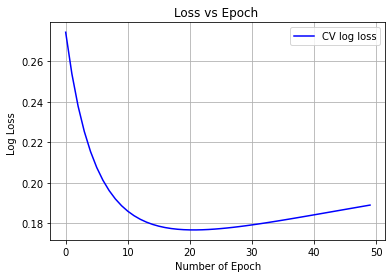

In [8]:
x = np.array([i for i in range(0, 50)])

train_log_loss_arr = np.array(train_log_loss)

plt.plot(x, train_log_loss_arr, "-b", label = 'Train log loss')

plt.legend(loc="upper right")
plt.grid()

plt.xlabel('Number of Epoch')
plt.ylabel('Log Loss ')

plt.title('Loss vs Epoch ')
plt.show()

### More References

https://stats.stackexchange.com/questions/5196/why-use-platts-scaling

https://drive.google.com/file/d/133odBinMOIVb_rh_GQxxsyMRyW-Zts7a/view

[2007 Paper](https://link.springer.com/content/pdf/10.1007/s10994-007-5018-6.pdf)